In [ ]:
import numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("StudentPerformance-encoded.csv", encoding='latin1')
df.head(15)

,Unnamed: 0,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,...,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,berat_badan,ipk,lulus_tepatwaktu
0,0,0,20,2,12,0,200000,50000,1,1,...,2,119,0,0,1,41,165,62.5,3.86,1
1,1,1,19,0,3,1,500000,70000,0,1,...,2,117,4,0,0,38,141,57.9,3.96,1
2,2,0,22,1,12,0,300000,100000,1,1,...,1,90,2,0,1,42,151,59.8,3.68,0
3,3,0,20,0,12,0,700000,100000,2,1,...,1,97,0,0,1,41,140,57.8,3.69,0
4,4,0,21,1,11,1,800000,80000,0,1,...,1,114,0,0,1,40,165,62.5,3.68,0
5,5,0,21,2,2,1,700000,50000,0,1,...,2,99,3,0,0,39,154,60.8,3.89,1
6,6,1,27,2,0,1,300000,40000,1,0,...,3,47,0,0,0,37,157,61.1,3.59,0
7,7,0,20,1,10,1,500000,60000,1,1,...,1,95,0,0,1,38,175,64.5,3.74,1
8,8,1,20,1,5,1,800000,150000,2,1,...,0,107,4,0,0,40,141,57.9,3.60,0
9,9,0,26,0,6,1,700000,200000,0,1,...,2,52,0,1,0,32,151,60.2,3.48,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                150 non-null    int64  
 1   jenis_kelamin             150 non-null    int64  
 2   umur                      150 non-null    int64  
 3   konsentrasi               150 non-null    int64  
 4   asal                      150 non-null    int64  
 5   kos                       150 non-null    int64  
 6   uang_saku                 150 non-null    int64  
 7   paket_data                150 non-null    int64  
 8   kendaraan                 150 non-null    int64  
 9   laptop                    150 non-null    int64  
 10  tipe_laptop               150 non-null    int64  
 11  status_menikah            150 non-null    int64  
 12  ip_sem1                   150 non-null    float64
 13  ip_sem2                   150 non-null    float64
 14  ip_sem3   

**Filter Method menggunakan Pearson Correlation**

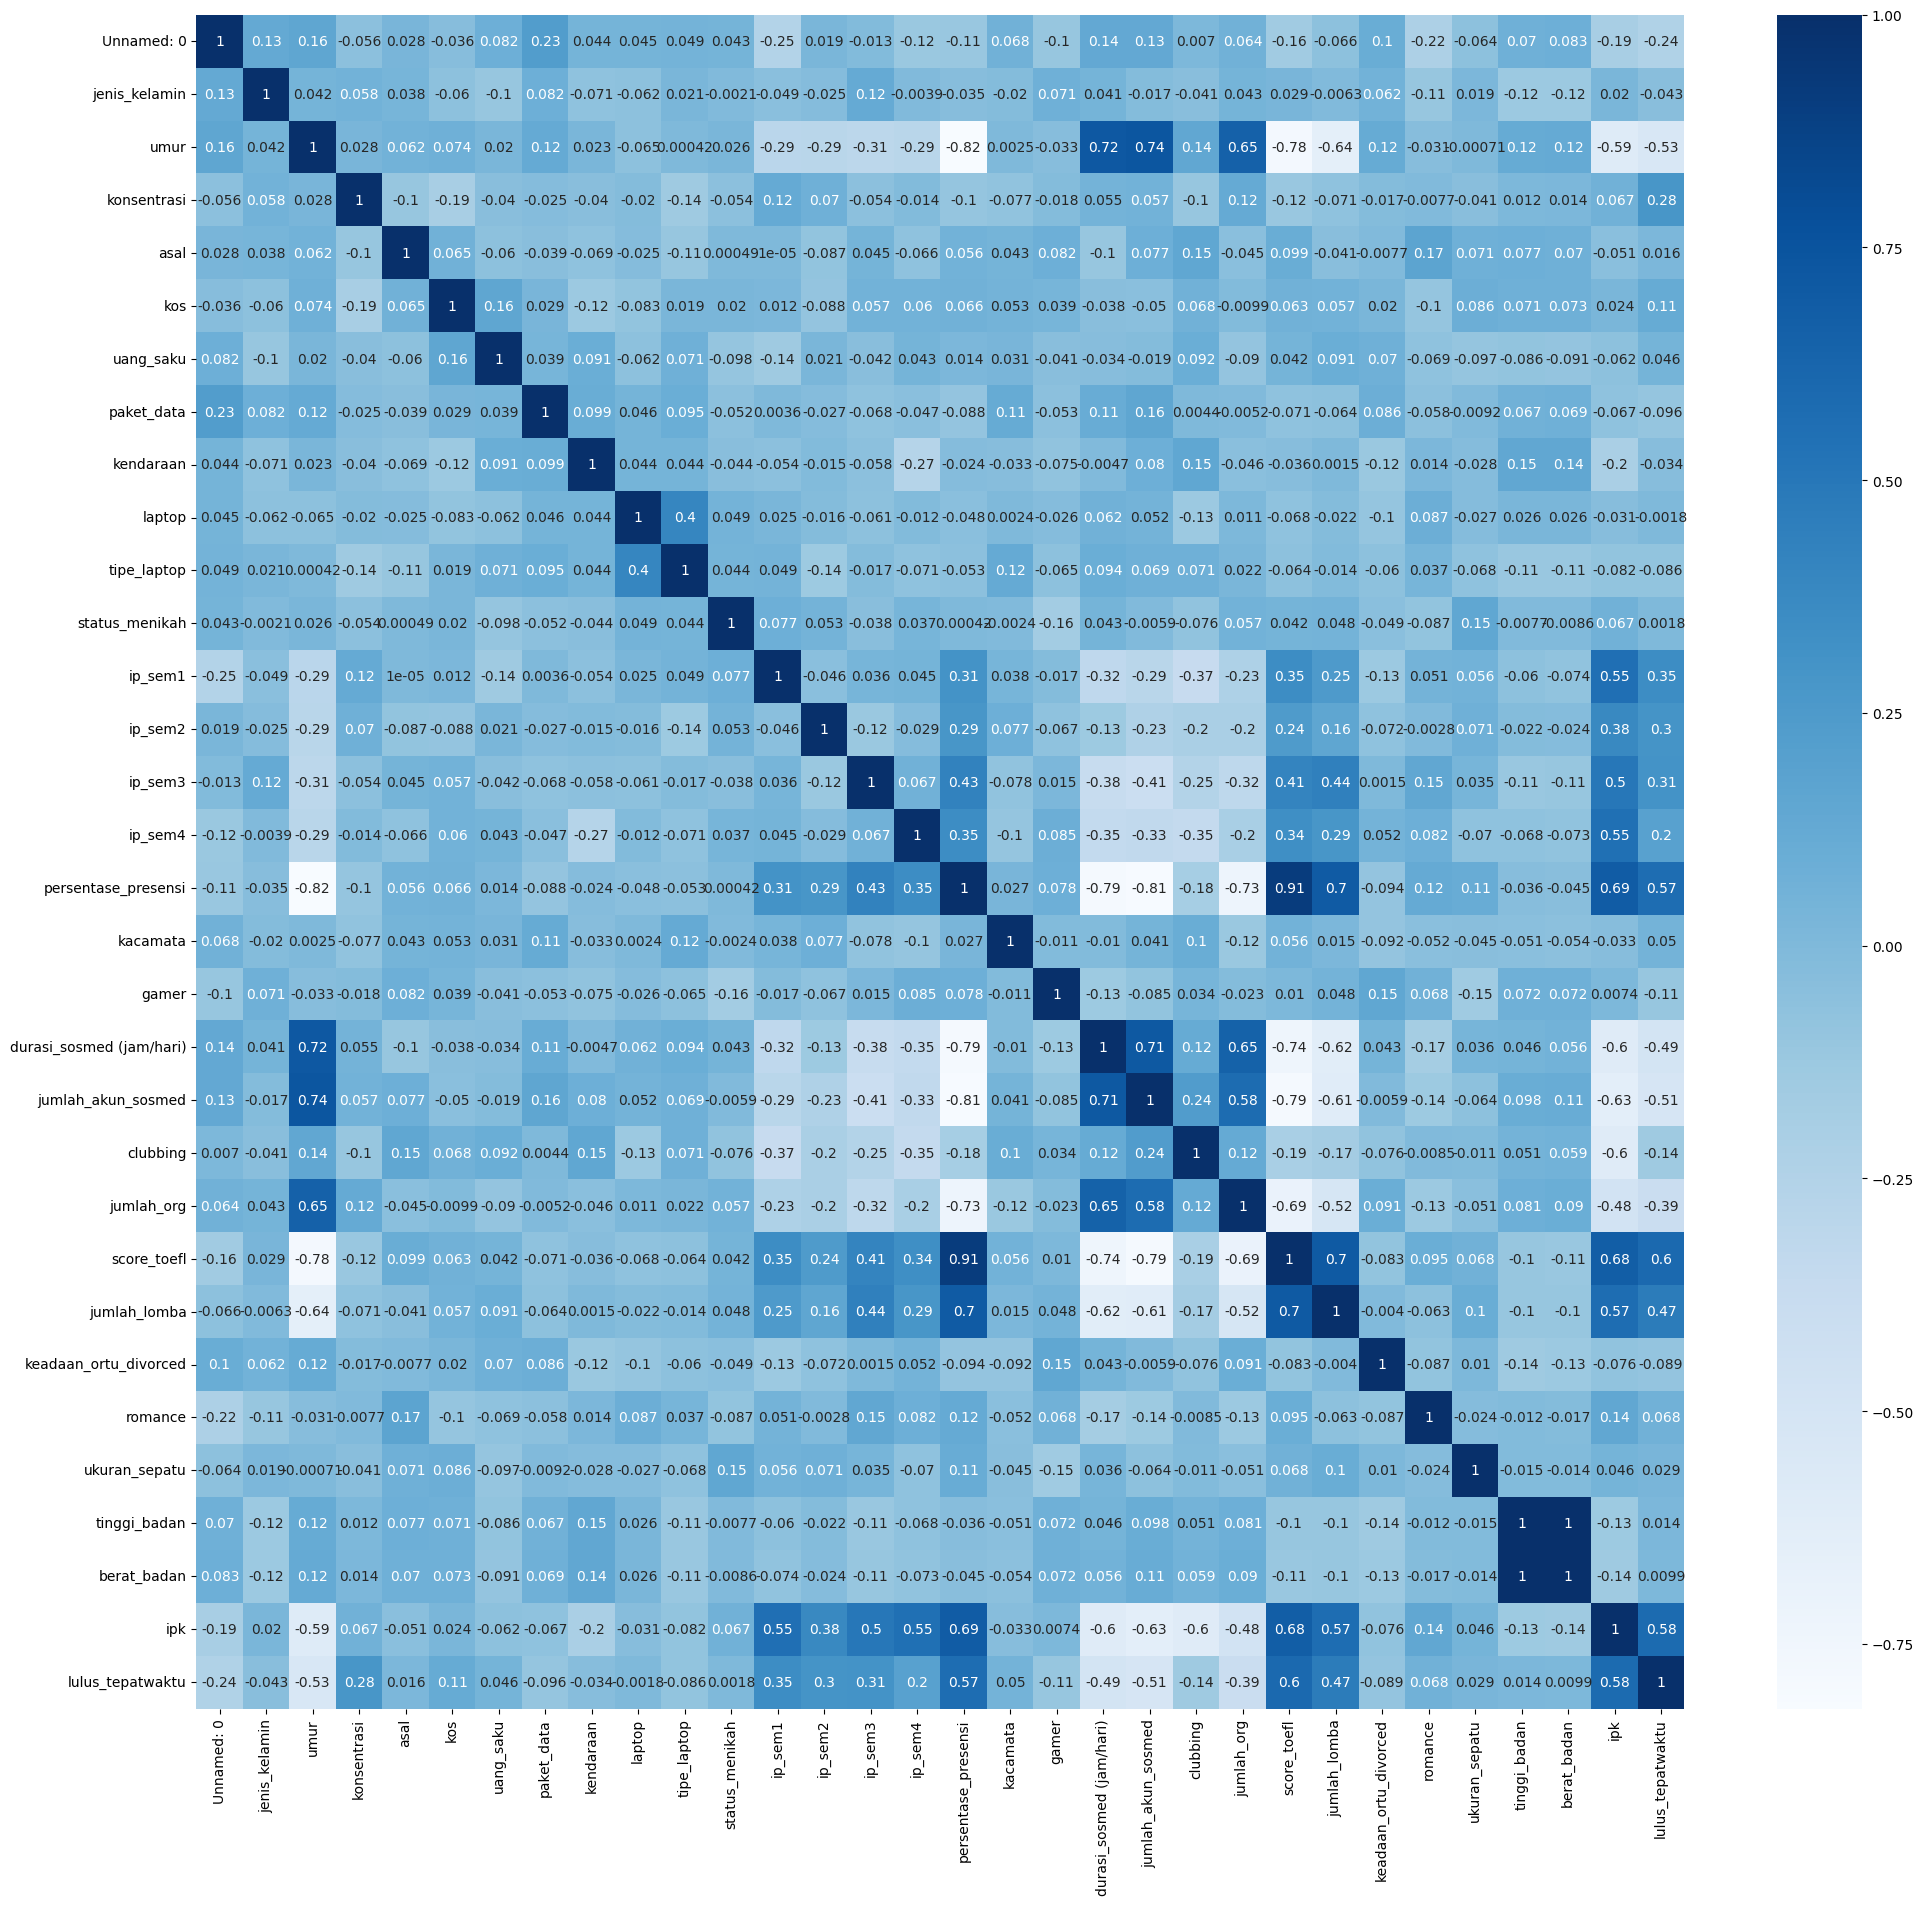

In [ ]:
cor = df.corr()
plt.figure(figsize = (24,22))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.show()

In [ ]:
cor_target = abs(cor["lulus_tepatwaktu"])

relevant_features = cor_target[cor_target>=0.5]
relevant_features

umur                   0.534956
persentase_presensi    0.568904
jumlah_akun_sosmed     0.509860
score_toefl            0.595081
ipk                    0.582700
lulus_tepatwaktu       1.000000
Name: lulus_tepatwaktu, dtype: float64

**Data Split**

In [ ]:
X = df.iloc[:, [1, 15, 18,19, 22, 29]].values
y= df.iloc[:, -1].values

In [ ]:
#menampilkan nilai x dan y
print('X \n',X[:5])
print('\ny \n',y[:5])

X 
 [[ 0.    3.8   1.    1.    2.   62.5 ]
 [ 1.    3.95  0.    3.    2.   57.9 ]
 [ 0.    3.5   1.    1.    1.   59.8 ]
 [ 0.    3.65  1.    2.    1.   57.8 ]
 [ 0.    3.65  0.    2.    1.   62.5 ]]

y 
 [1 1 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state= 21)

In [ ]:
print(X_train.shape)
print (y_train.shape)
print(X_test.shape)
print (y_test.shape)

(105, 6)
(105,)
(45, 6)
(45,)


**Create classifier model**

In [ ]:
# Training the Naive Bayes model on the Training set
classifier_model_binary = GaussianNB()
classifier_model_binary.fit (X_train, y_train)

GaussianNB()

**Predict test data**

In [ ]:
y_pred = classifier_model_binary.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
classifier_model_binary.predict_proba(X_test)

array([[4.64444960e-01, 5.35555040e-01],
       [1.00000000e+00, 3.42391137e-13],
       [6.51461038e-01, 3.48538962e-01],
       [9.99999335e-01, 6.65144765e-07],
       [9.76412175e-01, 2.35878254e-02],
       [9.99596037e-01, 4.03962572e-04],
       [9.99602284e-01, 3.97715974e-04],
       [1.00000000e+00, 5.97829271e-13],
       [9.99676524e-01, 3.23476422e-04],
       [9.99999999e-01, 6.60689850e-10],
       [1.00000000e+00, 1.20856313e-10],
       [9.99999998e-01, 2.03206356e-09],
       [9.99745279e-01, 2.54721010e-04],
       [8.59616921e-02, 9.14038308e-01],
       [9.99904932e-01, 9.50676822e-05],
       [9.99999532e-01, 4.67788919e-07],
       [9.99999073e-01, 9.27283101e-07],
       [1.00000000e+00, 1.30794207e-13],
       [9.36340078e-01, 6.36599218e-02],
       [9.99999999e-01, 1.48770528e-09],
       [9.99998030e-01, 1.96979389e-06],
       [9.99993396e-01, 6.60412212e-06],
       [1.00000000e+00, 5.18364114e-13],
       [9.90186502e-01, 9.81349824e-03],
       [2.900625

In [ ]:
def predict_one(persentase_presensi, ipk):
  print('Prediction: ',classifier_model_binary.predict([[persentase_presensi, ipk]]))
  print('Probability: ',classifier_model_binary. predict_proba([[persentase_presensi, ipk]]))

In [ ]:
def predict_one(age, persentase_presensi, durasi_sosmed, jumlah_sosmed, score_toefl, ipk):
  features = [[age, persentase_presensi, durasi_sosmed, jumlah_sosmed, score_toefl, ipk]]

**Evaluate**

In [ ]:
print(classification_report (y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.75      0.75      0.75         4

    accuracy                           0.96        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[40,  1],
       [ 1,  3]])

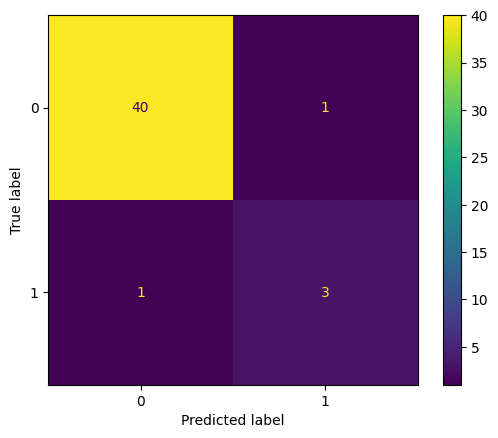

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay (confusion_matrix=cm,
                                display_labels=classifier_model_binary.classes_)
disp.plot()
plt.show()